In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df_peng = pd.read_csv('penguins_size.csv')

In [2]:
#check for null values in the dataset
df_peng.isnull().sum().sum()

18

In [3]:
df_peng = df_peng.dropna() #drop all the null values

In [4]:
df_peng.isnull().sum().sum()

0

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_peng = df_peng[df_peng["gender"] != '.']
df_peng['gender'].unique()

#seperate the features and the target
X = df_peng.drop(['gender'],axis=1)
Y = df_peng['gender']

objList = X.select_dtypes(include = "object").columns
print(objList)

en = LabelEncoder()

for i in objList:
    X[i] = en.fit_transform(X[i].astype(str))
# encode all string values to float in X for modelling
print (X.info())

Index(['species', 'island'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int32  
 1   island             333 non-null    int32  
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
dtypes: float64(4), int32(2)
memory usage: 15.6 KB
None


In [6]:
#splitting the data into train and test data with 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_clsf = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3 , min_samples_split = 3, random_state = 100)
dt_clsf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       random_state=100)

In [8]:
ypred = dt_clsf.predict(X_test)
print('Training-set accuracy score: {0:0.4f}'. format(dt_clsf.score(X_train,Y_train)))

Training-set accuracy score: 0.9056


[Text(0.4583333333333333, 0.875, 'culmen_depth_mm <= 18.05\nentropy = 0.998\nsamples = 233\nvalue = [111, 122]\nclass = MALE'),
 Text(0.25, 0.625, 'body_mass_g <= 5225.0\nentropy = 0.921\nsamples = 137\nvalue = [91, 46]\nclass = FEMALE'),
 Text(0.16666666666666666, 0.375, 'flipper_length_mm <= 219.5\nentropy = 0.567\nsamples = 105\nvalue = [91, 14]\nclass = FEMALE'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.411\nsamples = 97\nvalue = [89, 8]\nclass = FEMALE'),
 Text(0.25, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]\nclass = MALE'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = MALE'),
 Text(0.6666666666666666, 0.625, 'body_mass_g <= 3525.0\nentropy = 0.738\nsamples = 96\nvalue = [20, 76]\nclass = MALE'),
 Text(0.5, 0.375, 'culmen_depth_mm <= 18.55\nentropy = 0.75\nsamples = 14\nvalue = [11, 3]\nclass = FEMALE'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = FEMALE'),
 Text(0.583333333333333

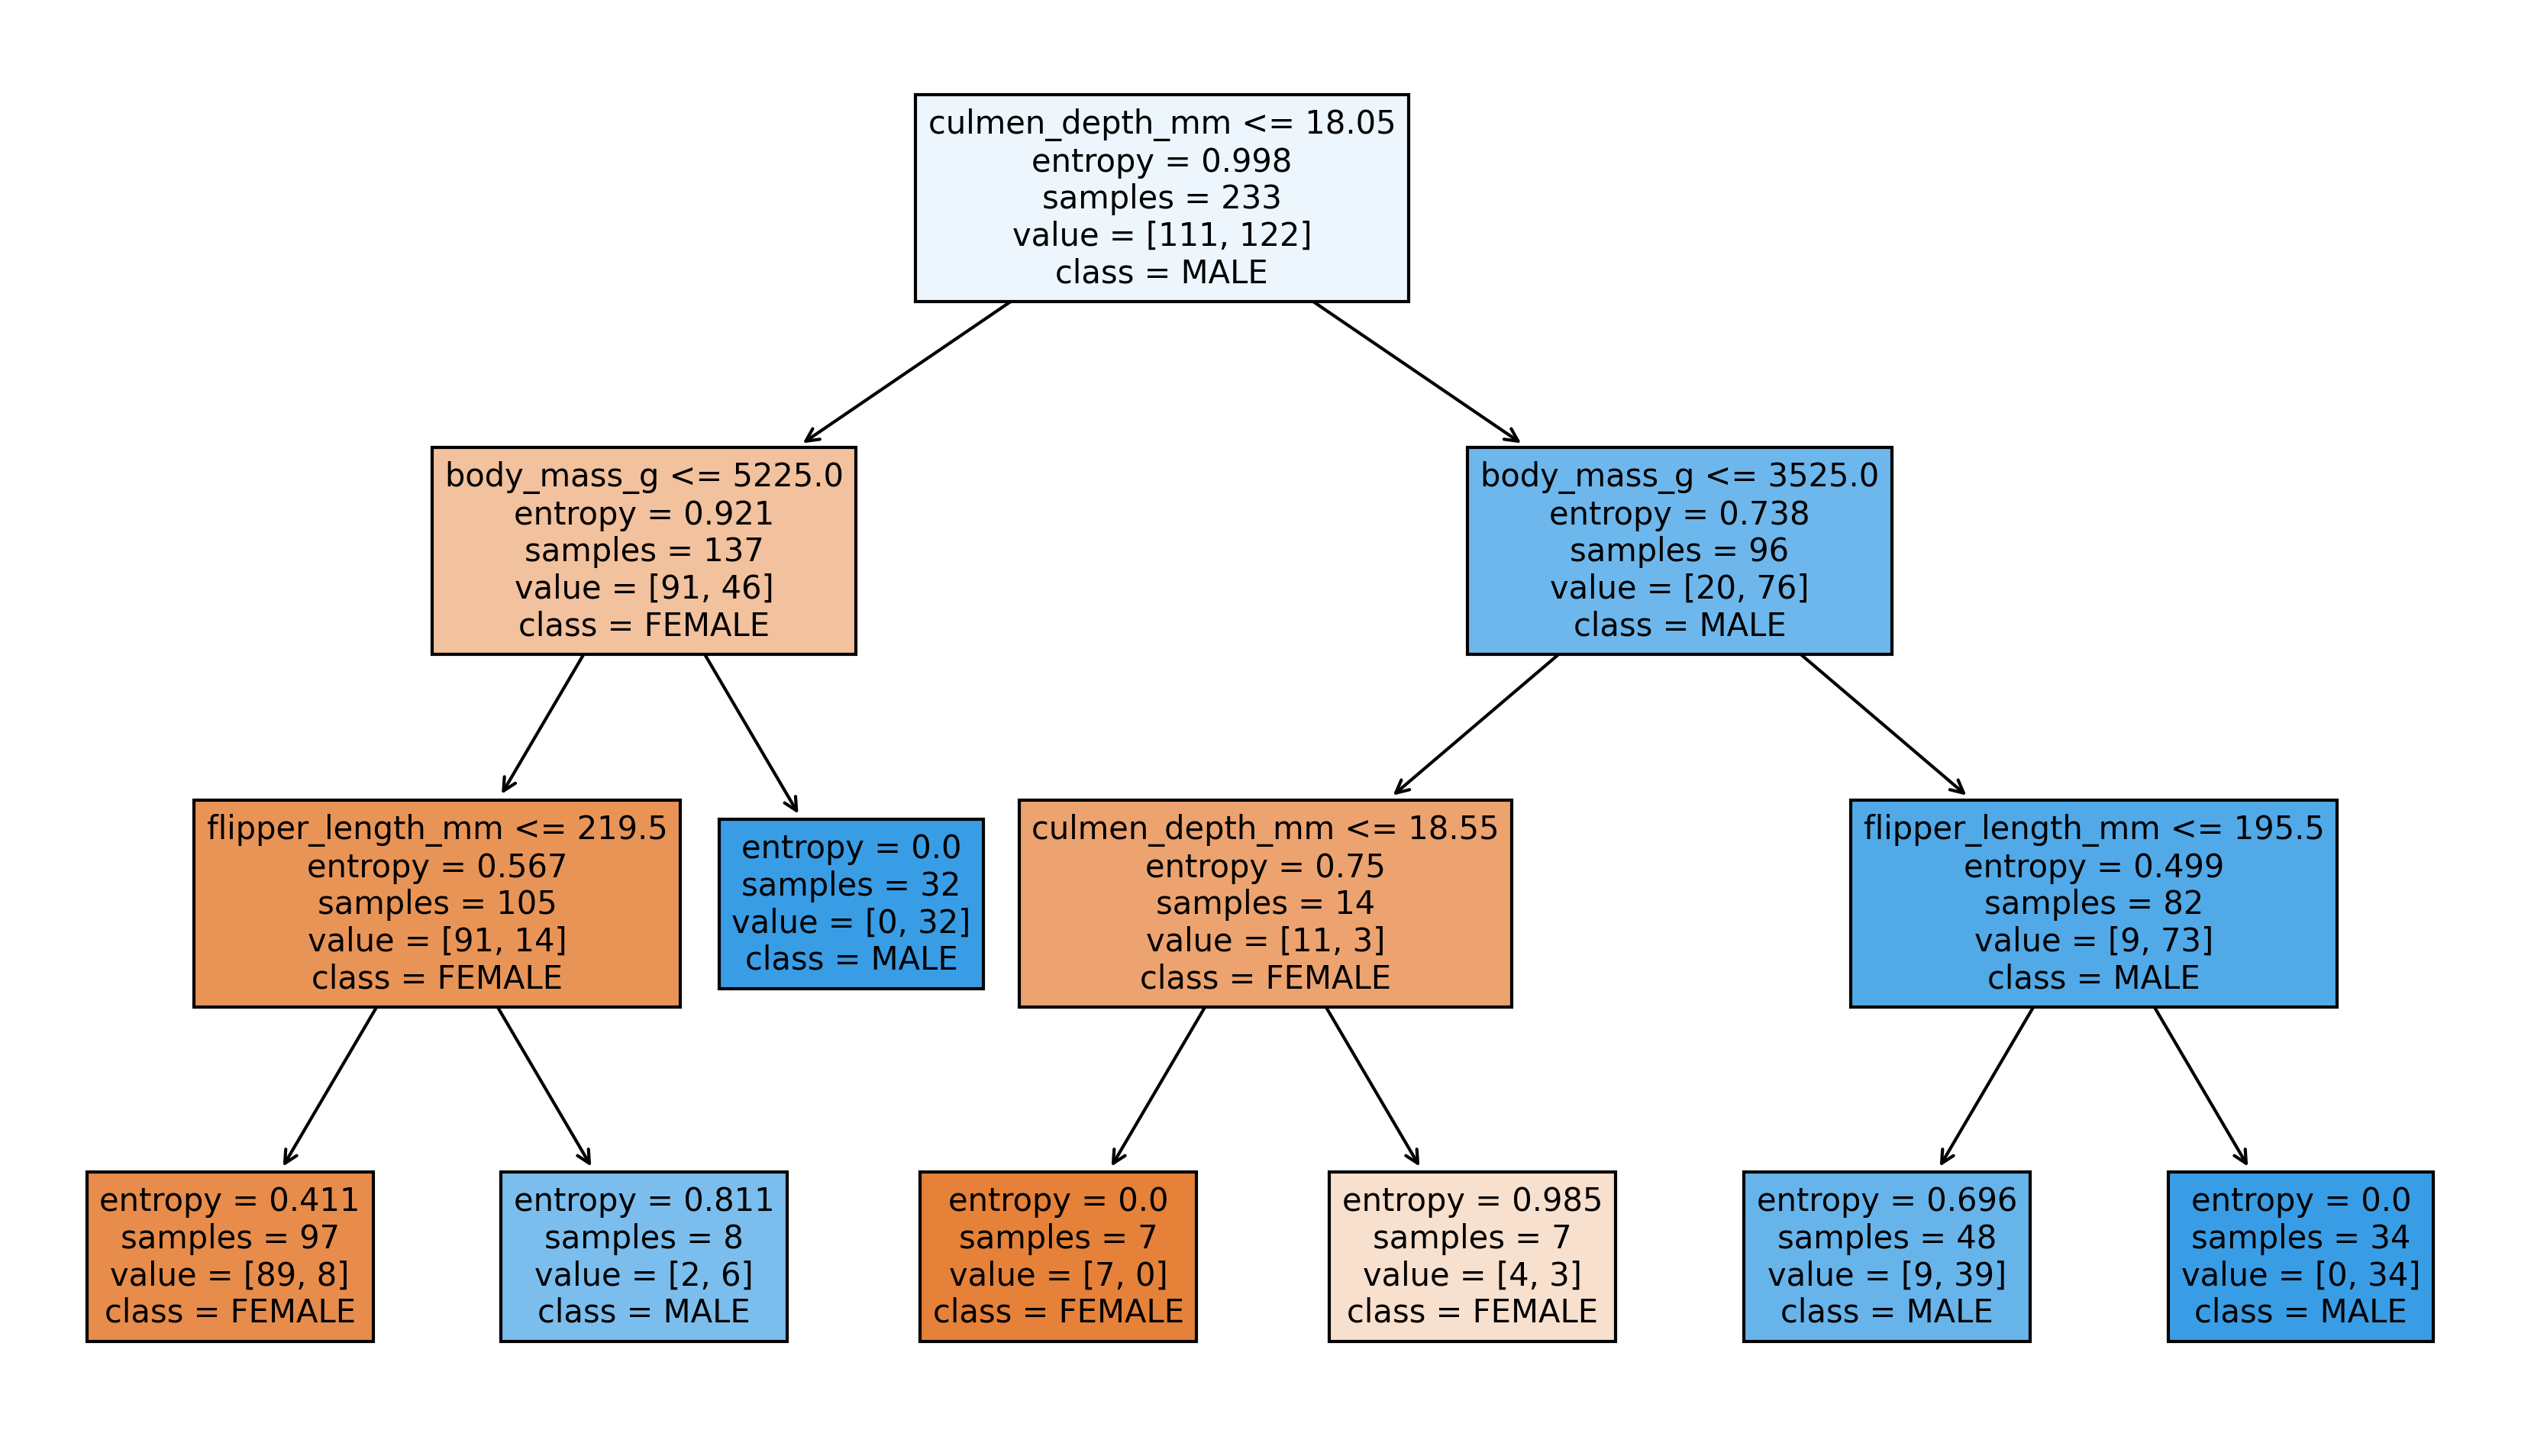

In [9]:
from sklearn.tree import plot_tree #to plot the decision tree
#Plot the tree
featr_list =list(X.columns)
cls_list = list(set(Y))
plt.figure(figsize=(14,8), dpi=300)
plot_tree(dt_clsf, feature_names = featr_list, class_names = cls_list, fontsize=10, filled =True)

## Decision Rules

In [24]:
from sklearn.tree import export_text

# export the decision rules
tree_rules = export_text(dt_clsf,
                        feature_names=list(X.columns))
# print the result
print(tree_rules)

|--- culmen_depth_mm <= 18.05
|   |--- body_mass_g <= 5225.00
|   |   |--- flipper_length_mm <= 219.50
|   |   |   |--- class: FEMALE
|   |   |--- flipper_length_mm >  219.50
|   |   |   |--- class: MALE
|   |--- body_mass_g >  5225.00
|   |   |--- class: MALE
|--- culmen_depth_mm >  18.05
|   |--- body_mass_g <= 3525.00
|   |   |--- culmen_depth_mm <= 18.55
|   |   |   |--- class: FEMALE
|   |   |--- culmen_depth_mm >  18.55
|   |   |   |--- class: FEMALE
|   |--- body_mass_g >  3525.00
|   |   |--- flipper_length_mm <= 195.50
|   |   |   |--- class: MALE
|   |   |--- flipper_length_mm >  195.50
|   |   |   |--- class: MALE



In [10]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(dt_clsf, X, Y, cv=5)
print("Cross Validation Score: ",scores.mean())
y_pred_train = dt_clsf.predict(X_train)
print('Model Accuracy(train)', metrics.accuracy_score(Y_train, y_pred_train))

Cross Validation Score:  0.8171867933061963
Model Accuracy(train) 0.9055793991416309


In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report

#The confusion matrix for predictions vs test cases
cm = confusion_matrix(Y_test,ypred)
print("confusion matrix: \n", cm, end="\n\n")
print("classification report:\n",classification_report(Y_test,ypred))
print('Model Accuracy(test)', metrics.accuracy_score(Y_test, ypred))

confusion matrix: 
 [[51  3]
 [11 35]]

classification report:
               precision    recall  f1-score   support

      FEMALE       0.82      0.94      0.88        54
        MALE       0.92      0.76      0.83        46

    accuracy                           0.86       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.87      0.86      0.86       100

Model Accuracy(test) 0.86


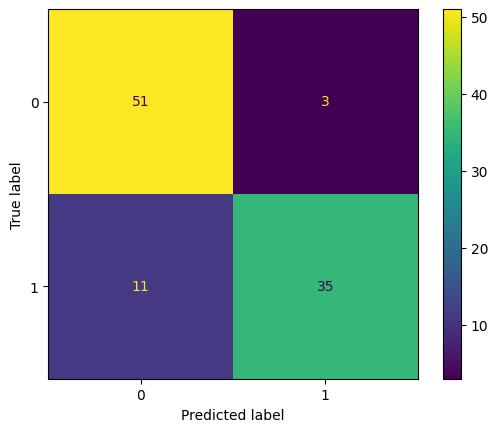

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('ConfusionMatrixPenguingData_Entropy.svg')

In [13]:
#compare predicted values with the actual scores
compare_df = pd.DataFrame({'actual': Y_test, 'predicted': ypred})
compare_df = compare_df.reset_index(drop = True)
print(compare_df)

    actual predicted
0   FEMALE    FEMALE
1     MALE      MALE
2   FEMALE    FEMALE
3   FEMALE    FEMALE
4   FEMALE    FEMALE
..     ...       ...
95  FEMALE    FEMALE
96  FEMALE    FEMALE
97  FEMALE    FEMALE
98  FEMALE    FEMALE
99  FEMALE    FEMALE

[100 rows x 2 columns]


In [14]:
compare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   actual     100 non-null    object
 1   predicted  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [15]:
compare_df.head(20)

,actual,predicted
0,FEMALE,FEMALE
1,MALE,MALE
2,FEMALE,FEMALE
3,FEMALE,FEMALE
4,FEMALE,FEMALE
5,MALE,MALE
6,FEMALE,FEMALE
7,MALE,FEMALE
8,MALE,MALE
9,MALE,MALE


<AxesSubplot:xlabel='predicted', ylabel='count'>

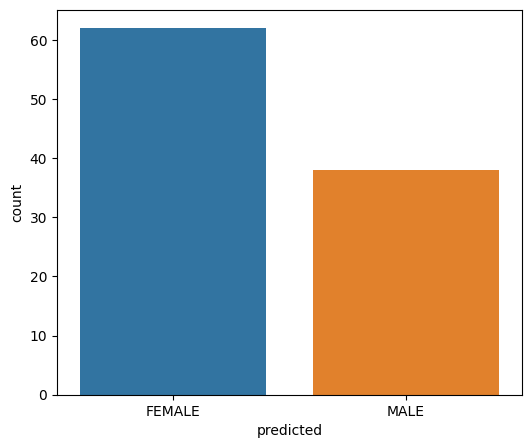

In [25]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.countplot(x=compare_df["predicted"], ax=ax)

<AxesSubplot:xlabel='actual', ylabel='count'>

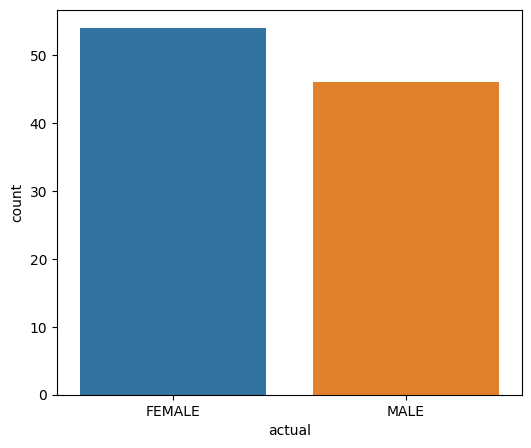

In [26]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
sns.countplot(x=compare_df["actual"], ax=ax)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train, Y_train)

y_pred_rf = rf_model.predict(X_test)
acc_rf = metrics.accuracy_score(Y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.91


In [17]:
#Use cross_val_score function to estimate the expected accuracy of the model on out-of-training data
scores = cross_val_score(rf_model, X, Y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8530529172320216


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [19]:
print_score(rf_model, X_train, Y_train, X_test, Y_test, train=True)
print_score(rf_model, X_train, Y_train, X_test, Y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           FEMALE   MALE  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support     111.0  122.0       1.0      233.0         233.0
_______________________________________________
Confusion Matrix: 
 [[111   0]
 [  0 122]]

Test Result:
Accuracy Score: 91.00%
_______________________________________________
CLASSIFICATION REPORT:
              FEMALE       MALE  accuracy   macro avg  weighted avg
precision   0.894737   0.930233      0.91    0.912485      0.911065
recall      0.944444   0.869565      0.91    0.907005      0.910000
f1-score    0.918919   0.898876      0.91    0.908898      0.909699
support    54.000000  46.000000      0.91  100.000000    100.000000
_______________________________________________
Conf